In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.datasets import fetch_20newsgroups

In [3]:
categories = [
 'comp.graphics',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'talk.politics.misc',
 'talk.religion.misc']

In [36]:
train_data = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)
train_y = train_data.target

test_data = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)
test_y = test_data.target

print(f"There are {len(train_data.data)} news for training")
print(f"There are {len(test_data.data)} news for testing")

There are 5578 news for training
There are 3714 news for testing


In [37]:
def adjust_data(data):
    """
    function to run in each string of the data set and apply the cleaning 
    
    Args:
        temp (string): variable to hold the values on each string while cleaning the dataset

    Returns:
        data (list of string) - lists containing the data cleaned
    """
    
    for i in range(len(data)):
        temp = data[i]
        temp = temp.split('\n')
        #removing the 'from' headline
        temp  = temp[1:]

        #removing empty indexes
        temp = [x for x in temp if x != '']

        #removing not alphabetical chars
        temp = [re.sub(r'/^[\w&.\-]+$/',' ',i) for i in temp]

        #removing the string that appear in every sentence
        temp = [x.replace('Subject: ','') for x in temp]

        temp = [x.replace('Re: ','') for x in temp]
    
        data[i] = ' '.join(temp)
    
    return data

In [38]:
train_x = adjust_data(train_data.data)
test_x = adjust_data(test_data.data)

# Most common words

In [39]:
def create_text_dict(x,y,categories=categories):
    text_dicts = {}
    
    for id,i in enumerate(y):

        label = categories[i]

        if not label in text_dicts.keys():
            text_dicts[label]=[]
        
        text_dicts[label].append(x[id])

    return text_dicts

In [40]:
test = create_text_dict(train_x,train_y)


In [41]:
test['sci.med']

['oxaprozin? Organization: AT&T Keywords: Daypro Lines: 7 Anyone have any information on the effects/origin of oxaprozin? It\'s marketed under the name "DAYpro", and appears to be an anti-inflammatory.  Is it similar to naproxin?  Stronger? TIA GMS',
 'HYPOGLYCEMIA Distribution: world Organization: Invention Factory\'s BBS - New York City, NY - 212-274-8298v.32bis Reply-To: jim.zisfein@factory.com (Jim Zisfein)  Lines: 19 >From: anello@adcs00.fnal.gov (Anthony Anello) >Can anyone tell me if a bloodcount of 40 when diagnosed as hypoglycemic is >dangerous, i.e. indicates a possible pancreatic problem?  One Dr. says no, the >other (not his specialty) says the first is negligent and that another blood Blood glucose levels of 40 or so are common several hours after a big meal.  This level will usually not cause symptoms. >test should be done.  Also, what is a good diet (what has worked) for a hypo- >glycemic? If you mean "reactive" hypoglycemia, there are usually no symptoms, hence there is

comp.graphics


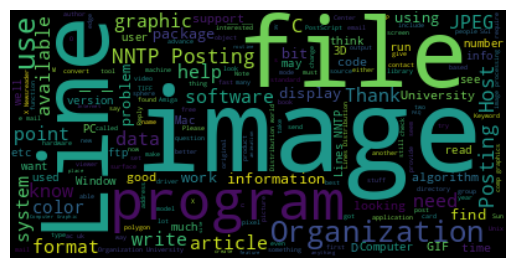

misc.forsale


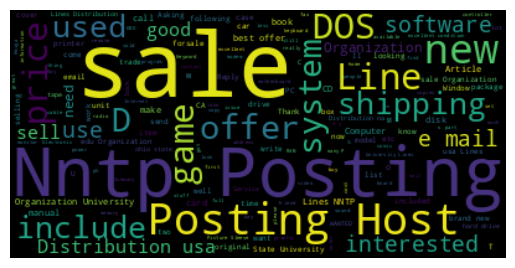

rec.autos


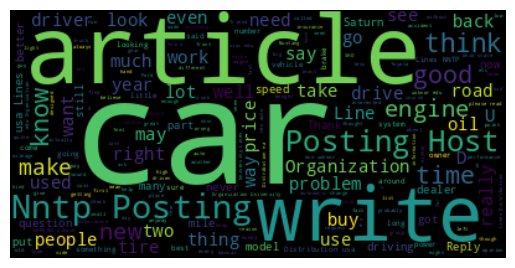

rec.motorcycles


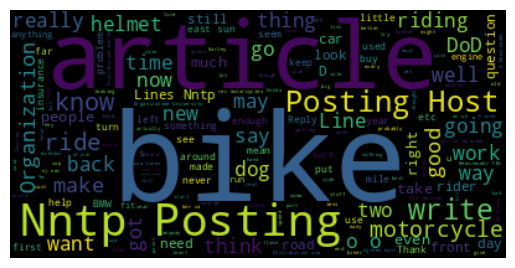

rec.sport.baseball


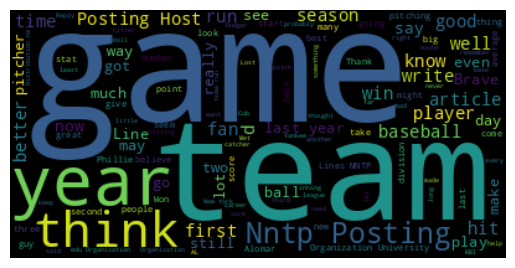

sci.electronics


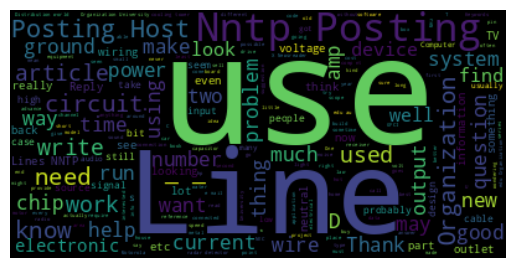

sci.med


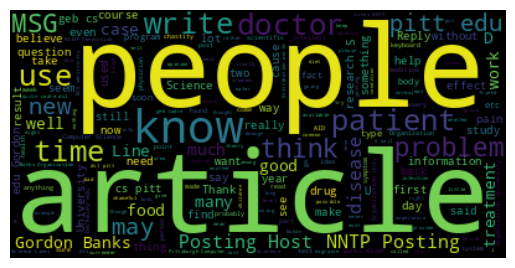

sci.space


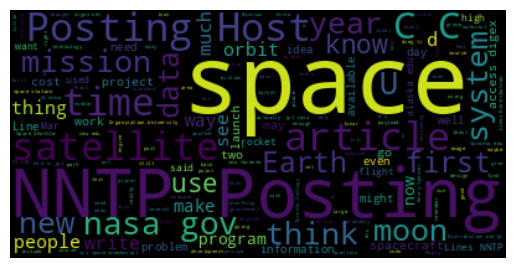

talk.politics.misc


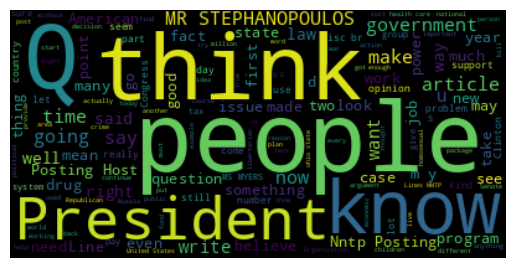

talk.religion.misc


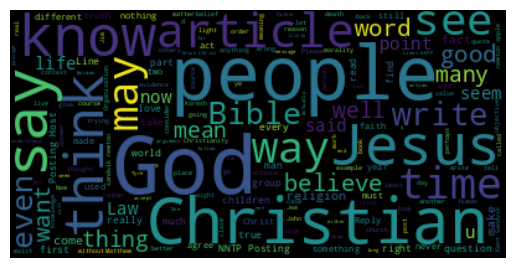

In [48]:
for label in categories:
    text = ' '.join(test[label])

    #The words 'one' and 'will' is reapeated too 
    # much and don't aggragate on the analysis
    
    text = text.replace('one',' ')
    text = text.replace('will',' ')

    wordcloud = WordCloud().generate(text)

    print(label)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()